In [1]:
import sys
from pathlib import Path
import functools

import mujoco
from brax import envs
import jax
import jax.numpy as jp

from envs import register_framed_hopper
from shac.brax_wrappers import AppendObsHistory

import shac.networks as shac_networks
# import shac.train as  shac
from shac.train_class import SHAC

In [2]:
env_name = 'framed_hopper'

log_sigma = None
make_networks_factory = functools.partial(
    shac_networks.make_shac_networks,
        policy_hidden_layer_sizes=(64, 64),
        value_hidden_layer_sizes =(64, 64),
        scalar_var=False,
        layer_norm=True)

In [3]:
# Parameters
num_grad_checks = None

num_epochs = 200
num_evals = num_epochs + 1

unroll_length = 32

num_envs = 64

# critic_batch_size = 512/(32/unroll_length)/(64/num_envs)
# critic_batch_size = 1

num_timesteps = (num_envs*unroll_length)*num_epochs

num_critic_minibatches = 4
num_critic_data = num_envs*unroll_length
critic_batch_size = num_critic_data / num_critic_minibatches

episode_length = 240 


In [4]:
env      = AppendObsHistory(envs.get_environment(env_name), h=3)
eval_env = AppendObsHistory(envs.get_environment(env_name), h=3)
# env = envs.get_environment(env_name)
# eval_env = envs.get_environment(env_name)

In [5]:
kwargs = dict(
  num_timesteps=num_timesteps, log_sigma=log_sigma,
  num_evals=num_evals, use_tbx=True, tbx_logdir=f'{env_name}_log',
  tbx_experiment_name="obs_hist_wrapped", reward_scaling=1, 
  num_eval_envs = 64, num_envs=num_envs,
  unroll_length=unroll_length, critic_batch_size=critic_batch_size,
  critic_epochs = 16,target_critic_alpha = 0.2,
  discounting = 0.99, lambda_ = 0.95,
  normalize_observations=True,
  episode_length=episode_length, 
  network_factory = make_networks_factory, 
  seed=10, entropy_cost = 1e-3,
  resample_init=True,
  scramble_initial_times=True,
  num_grad_checks=num_grad_checks,
  save_all_checkpoints=True
)

trainer = SHAC(environment=env, eval_env=eval_env, **kwargs)
make_inference_fn, policy_params, value_params, _= trainer.train()

# train_fn = functools.partial(shac.train, 
#                             num_timesteps=num_timesteps, log_sigma=log_sigma,
#                             num_evals=num_evals, use_tbx=True, tbx_logdir=f'{env_name}_log',
#                             tbx_experiment_name="obs_hist_wrapped", reward_scaling=1, 
#                             num_eval_envs = 64, num_envs=num_envs,
#                             unroll_length=unroll_length, critic_batch_size=critic_batch_size,
#                             critic_epochs = 16,target_critic_alpha = 0.2,
#                             discounting = 0.99, lambda_ = 0.95,
#                             normalize_observations=True,
#                             episode_length=episode_length, 
#                             network_factory = make_networks_factory, 
#                             seed=0, entropy_cost = 1e-3,
#                             resample_init=True,
#                             scramble_initial_times=True,
#                             num_grad_checks=num_grad_checks,
#                             save_all_checkpoints=True)

# make_inference_fn, policy_params, value_params, _= train_fn(
#   environment=env,
#   eval_env=eval_env)


Env steps per training step: 2048
Training steps per epoch: 1
Critic minibatches per critic epoch: 4
Initial eval time: 8.4663 s
Deleting old checkpoints!
Checkpointed for epoch 0
Checkpointed for epoch 1
Checkpointed for epoch 2
Checkpointed for epoch 3
Checkpointed for epoch 4
Checkpointed for epoch 5
Checkpointed for epoch 6
Checkpointed for epoch 7
Checkpointed for epoch 8
Checkpointed for epoch 9
Checkpointed for epoch 10
Checkpointed for epoch 11
Checkpointed for epoch 12
Checkpointed for epoch 13
Checkpointed for epoch 14
Checkpointed for epoch 15
Checkpointed for epoch 16
Checkpointed for epoch 17
Checkpointed for epoch 18
Checkpointed for epoch 19
Checkpointed for epoch 20
Checkpointed for epoch 21
Checkpointed for epoch 22
Checkpointed for epoch 23
Checkpointed for epoch 24
Checkpointed for epoch 25
Checkpointed for epoch 26
Checkpointed for epoch 27
Checkpointed for epoch 28
Checkpointed for epoch 29
Checkpointed for epoch 30
Checkpointed for epoch 31
Checkpointed for epoch 

at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 147


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 148


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 149


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 150


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 151


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 152


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 153


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 154


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 155


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 156


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 157


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 158


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 159


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 160


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 161


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 162


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 163


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 164


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 165


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 166


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 167


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 168


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 169


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 170


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 171


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 172


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 173


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 174


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 175


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 176


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 177


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 178


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 179


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 180


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 181


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 182


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 183


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 184


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 185


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 186


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 187


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 188


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 189


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 190


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 191


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 192


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 193


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 194


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 195


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 196


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 197


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 198


at mapped index 0: Gradient ~ 0! (`check` failed)
Checkpointed for epoch 199


at mapped index 0: Gradient ~ 0! (`check` failed)


AttributeError: 'SHAC' object has no attribute 'num_timesteps'

#### Eval

In [ ]:
# utils_path = Path(Path.cwd().parent,
#                   Path("benchmarks"),
#                   Path("quadruped_stability_studies"))
# sys.path.append(str(utils_path))

from jax_shac.utils.eval_utils import plot_jacobian_norms, visualize_rollout, plot_rews

In [ ]:
renderer = mujoco.Renderer(env.model)

In [ ]:
jit_reset = jax.jit(env.reset)
jit_step = jax.jit(env.step)
# jit_inference_fn = jax.jit(make_inference_fn(policy_params))

rng = jax.random.key(141)
init_key, rollout_key, rng = jax.random.split(rng, 3)
s0 = jit_reset(init_key)

jit_inference_fn = jax.jit(make_inference_fn(policy_params))

In [ ]:
if False:
    def spoof_policy(_, rng):
        bb = jax.random.choice(rng, jp.array([-1, 1]), 
                            p=jp.array([0.9, 1]))
        return bb.reshape(1), {}
        # return 2*(jax.random.uniform(rng).reshape(1)-0.5), {}
    jit_inference_fn = jax.jit(spoof_policy)

<Figure size 640x480 with 0 Axes>

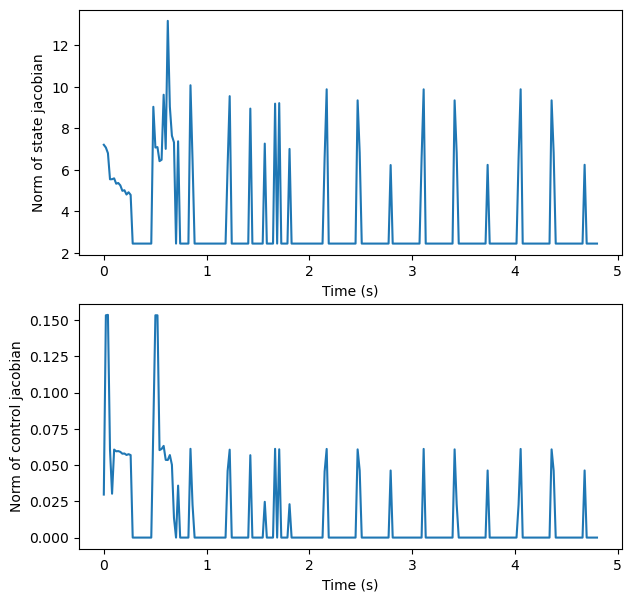

In [ ]:
if True:
    """ 
    Nan gradients:
    - Not seen in forward-mode AD
    - Jacrev doesn't work
    - Unclear whether nan's in training come from user code or MJX
        - https://github.com/google-deepmind/mujoco/issues/1349
    """
    all_jacs, state_jacs, ctrl_jacs = plot_jacobian_norms(s0, rollout_key, env, jit_inference_fn,
                                                jit_step, episode_length=240,
                                                ret_jacs=True, jacmode='fwd')

In [ ]:
state_h, states = visualize_rollout(s0, rollout_key, env, 
                                    jit_inference_fn, jit_step, renderer, 
                                    episode_length=240, print_nans=False, 
                                    print_dones=True, ret_states=True, camera="track")

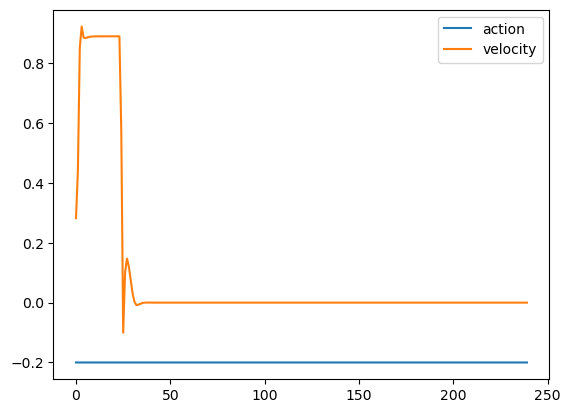

In [ ]:
rews = plot_rews(states)